In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

## Sodium 5890 and 5896 doublet arises from the 3p - 3s transition:
<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/imgqua/Nadoub.gif" width="200 pt">


## Solar spectrum is from: http://bass2000.obspm.fr/solar_spect.php

In [3]:
spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

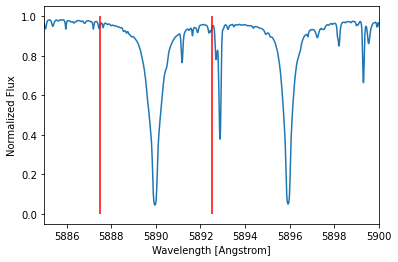

In [4]:
plt.plot(spec["col1"], spec["col2"] / 1e4)
# plt.vlines(5887.5, 0, 10000, color="red")
# plt.vlines(5892.5, 0, 10000, color="red")
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

## Equivalent width (ew) is defined as the width of a rectangle with a height equal to that of continuum emission such that the area of the rectangle is equal to the area in the spectral line.

In [5]:
ind = np.where((spec["col1"] < 5892.5) & (spec["col1"] > 5887.5))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.8346720000182191  Angstrom


In [6]:
np.log10(0.83 / 5890.0)

-3.8510372024110278

## Now find the number of Na atoms in absorbing state based on the following curve of growth plot:
<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

In [7]:
10**14.8 / 0.65 / (5890 / 5000) / 1e14

8.240268309784437

## log(W/$\lambda$) = log(0.83 / 5890) = -3.85, where W is equivalent width.
## The corresponding value on x-axis is log(Nf($\lambda/5000\overset{\circ}{A}$))$\sim$14.8.
## Rearranged, we have N = $8.24\times10^{14}$ with the unit of atoms/cm$^2$, assuming f = 0.65, where f is the oscillator strength for this transition at 5890 $\overset{\circ}{A}$.

## A good tutorial of Boltzmann and Saha equation can be found here: 
http://personal.psu.edu/rbc3/A501/saha.pdf

http://faculty.tamuc.edu/cbertulani/ast/lectures/Lec7.pdf

http://people.physics.tamu.edu/belyanin/astr314/lecture8.pdf

## Questions:
## 1, Estimate the ratio of sodium atoms in the ground state to sodium atoms in excited states using the Boltzmann equation:

## $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$, where subscripts 1 and 2 refer to 3s and 3p states, $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.

## 2, Estimate the ratio of neutral sodium atoms to ionized sodium atoms. You will use the Saha equation:

## $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$, where $m_e$ is electron mass, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, and the ionization energy $\chi = 5.1$ eV. Note that the values given are for the sodium line only. Other lines have different values. 

## 3, Compute the total column density of sodium atoms in the sun's photosphere, assuming the total number of sodium atoms equals to: $N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}}$). $N_1$ is measured from the curve of growth. The last two terms have been calculated in question 1 and 2. 

## 4, The column density of hydrogen atoms is about $6.6\times10^{23}$; what is the abundance of sodium relative to hydrogen?

## In astronomers' term, we set log relative abundance for Hydrogen at 12. Abundances of other elements are expressed as: $12 + log_{10}(N_{element}/N_{H})$, where N is in mole or number density. For example, in solar atmosphere, $N_{He}/N_{H}\sim1/10$ and therefore log abundance for He is $\sim$11. More precisely, 10.93 according to: https://par.nsf.gov/servlets/purl/10036398.  

## \*\*\*Bonus***: try a different line from a different element, e.g., Mg, Si, or Fe, and see how close you can get to the solar value and explain the difference. 

## Further reading: 
## 1, Formation of Sodium lines in solar spectrum: https://www.chem.uci.edu/~unicorn/249/Handouts/RWFSodium.pdf
## 2, Nomenclature of electron energy levels: https://www.dummies.com/education/science/chemistry/how-to-represent-electrons-in-an-energy-level-diagram/

## https://www.chemicool.com/definition/degenerate.html
 
## Saha equation: https://www.youtube.com/watch?v=MFqrF2izvgs

## Please refrain from reading the solution here: http://spiff.rit.edu/classes/phys440/lectures/curve/curve.html

In [8]:
import JW_lib
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [9]:
astropy.io.fits.open('lte5800-4.50-0.0a+0.0.BT-dusty-giant-2013.cf128.sc.spid.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000029EE1F49F10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000029EE4541E20>]

In [11]:
a = JW_lib.PhoenixSpec(file_name='lte5800-4.50-0.0a+0.0.BT-dusty-giant-2013.cf128.sc.spid.fits')
spec = a.readPHOENIXSpec()

In [12]:
%matplotlib inline
spec = spec.getChunk(0.5, 0.6)

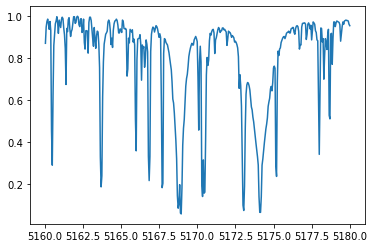

In [13]:
spec_mg = spec.getChunk(0.5160, 0.5180)
spec_mg.wavelength = spec_mg.wavelength * 1e4
spec_mg.flux = spec_mg.flux / np.max(spec_mg.flux)
plt.plot(spec_mg.wavelength, spec_mg.flux)

In [14]:
spec_mg.writeSpec(file_name="Mg5168.txt")